<a href="https://colab.research.google.com/github/felipemachadorocha/MPV_Analise_de_Dados/blob/main/PROJETO_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Felipe Machado Rocha

**Dataset:** https://raw.githubusercontent.com/felipemachadorocha/MPV_Analise_de_Dados/refs/heads/main/car_price_dataset.csv

## Descrição do Problema

Este é um problema de aprendizagem supervisionada porque o dataset contém a variável-alvo que desejamos prever o preço. O modelo aprenderá com base em dados históricos para estimar esse preço, o que caracteriza um problema de regressão.

## Hipóteses do Problema

*   Carros mais novos tendem a ter um preço maior.
*   Carros com menor quilometragem tendem a ter um preço maior.
*   A marca e o modelo dos carros podem ser um fator determinante para um preço mais elevado.
*   O número de donos anteriores pode influenciar o valor do carro.
*   O motor do carro pode influenciar o seu valor.









## Tipo do Problema

Esse é um problema de aprendizado supervisionado já que temos no dataset a variável que queremos prever que é o preço, o modelo aprederá a partir dos dados históricos, que caracteriza um problema de regreção.

##Atributos do Dataset

*   Brand: A marca do carro (ex: Kia, Chevrolet, Mercedes).
*   Model: O modelo específico do carro (ex: Rio, Malibu, GLA).
*   Year: O ano de fabricação do carro.
*   Engine_Size: O tamanho do motor em litros.
*   Fuel_Type: O tipo de combustível que o carro utiliza (ex: Diesel, Híbrido, Elétrico, Gasolina).
*   Transmission: O tipo de transmissão (Manual, Automática, Semi-automática).
*   Mileage: A quilometragem total percorrida pelo carro.
*   Doors: O número de portas do carro.
*   Owner_Count: O número de proprietários anteriores do carro.
*   Price: O preço de venda do carro (nossa variável alvo).

## Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
#Atribuindo URL do Dataset à uma variável
carros = 'https://raw.githubusercontent.com/felipemachadorocha/MPV_Analise_de_Dados/refs/heads/main/car_price_dataset.csv'

In [3]:
# Carregando os dados utlizando o pandas
dados = pd.read_csv(carros)

In [4]:
# Mostrando as 5 primeiras linhas do Dataset
dados.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


## Análise do Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset carros, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

### Estatísticas Descritivas

In [5]:
# Quantidade de atributos e instâncias existentes
print(f"O dataset possui {dados.shape[0]} instâncias (linhas) e {dados.shape[1]} atributos (colunas).")
print("-" * 50)

# Tipo de dados dos atributos
print("Tipos de dados por coluna:")
print(dados.info())
print("-" * 50)

# Verificanco se existe valores nulos por coluna
print("Contagem de valores nulos por coluna:")
print(dados.isnull().sum())

O dataset possui 10000 instâncias (linhas) e 10 atributos (colunas).
--------------------------------------------------
Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None
--------------------------------------------------
Contagem de valores nulos por coluna:
Brand           0
Model           0
Year            0
Engine_Size     0

In [6]:
# Resumo estatístico dos atributos
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2011.54370,6.897699,2000.0,2006.00,2012.0,2017.0,2023.0
Engine_Size,10000.0,3.00056,1.149324,1.0,2.00,3.0,4.0,5.0
Mileage,10000.0,149239.11180,86322.348957,25.0,74649.25,149587.0,223577.5,299947.0
Doors,10000.0,3.49710,1.110097,2.0,3.00,3.0,4.0,5.0
Owner_Count,10000.0,2.99110,1.422682,1.0,2.00,3.0,4.0,5.0
Price,10000.0,8852.96440,3112.596810,2000.0,6646.00,8858.5,11086.5,18301.0


**Considerações sobre o resumo estátiscico do dataset:**

O conjunto de dados tem informações de 10.000 carro usados e neste conjuntos não existe valores nulos.

**Year -** Os carros no conhunto de dados foram fabricados entre os anos 2000 e 2023. A média de ano de fabricação é aproximadamente 2011, e metade dos carros são do ano 2012 ou mais recentes.

**Engine_Size -** O tamanho do motor varia de 1.0 a 5.0. O tamanho médio e também o mais comum (mediana) é de 3.0

**Mileage -** A quilometragem dos veículos apresenta uma grande variação, indo de apenas 25 km até quase 300.000 km. A média de quilometragem é de aproximadamente 149.239 km.

**Doors -** Os carros têm de 2 a 5 portas. A maioria dos carros tem entre 3 ou 4 portas, com a média sendo de aproximadamente 3 portas.

**Owner_Count -** A quantidade de donos anteriores varia de 1 a 5. Em média, um carro neste conjunto de dados teve cerca de 3 proprietários.

**Price -** Os preços variam de 2.000 a 18.301. O preço médio de um carro é de aproximadamente 8.853, com metade dos carros custando até 8.858.

###Análise de Distribuição de Frequências

In [7]:
# Definição de tema dos gráficos
sns.set_theme(style='white')

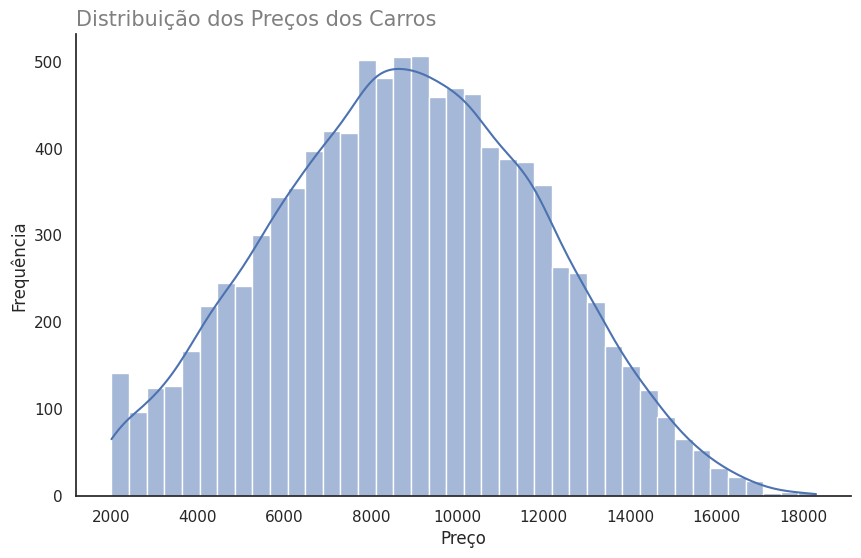

In [8]:
# Gráfico de distribuição de preços dos carros
fig, ax = plt.subplots(figsize =(10,6))
sns.histplot(data=dados, x='Price', kde=True, ax=ax)
ax.set_title('Distribuição dos Preços dos Carros', fontsize = 15, loc ='left', color='gray')
ax.set_xlabel('Preço')
ax.set_ylabel('Frequência')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

O histograma mostra que a distribuição de preços dos carros tem maior concentração de veículos na faixa entre 8.000 e 10.000. A distribuição geral dos dados se assemelha a uma curva normal, o que indica que a maioria dos preços está agrupada em torno de uma média central, com uma quantidade progressivamente menor de carros nos extremos de preços baixos ou altos. A faixa de preço dos carros fica entre 2.000 e 18.000, aproximadamente.

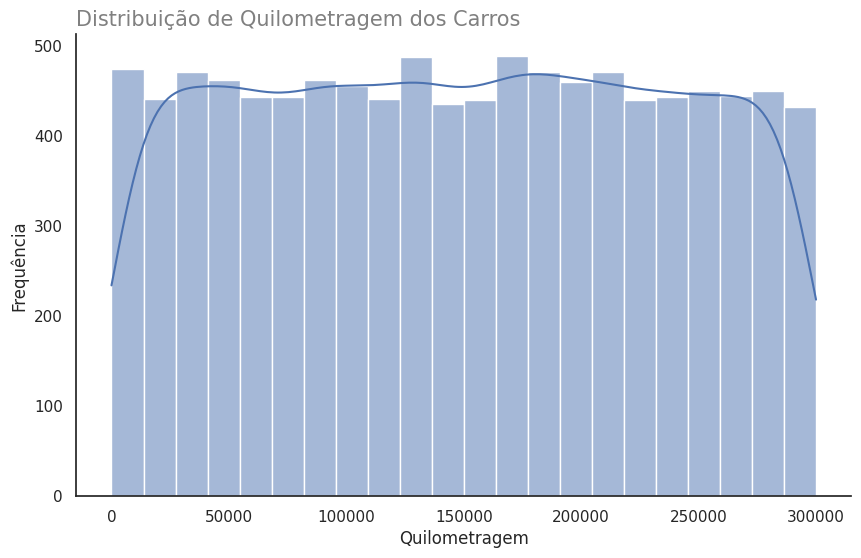

In [9]:
# Gráfico de distribuição de quilometragem dos carros
fig, ax = plt.subplots(figsize =(10,6))
sns.histplot(data=dados, x='Mileage', kde=True, ax=ax)
ax.set_title('Distribuição de Quilometragem dos Carros', fontsize = 15, loc ='left', color='gray')
ax.set_xlabel('Quilometragem')
ax.set_ylabel('Frequência')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

O histograma mostra uma distribuição uniforme e equilibrada, indicando que a quantidade de carros é praticamente a mesma em todas as faixas, de baixa a alta.

### Análise de Atributos Categóricos

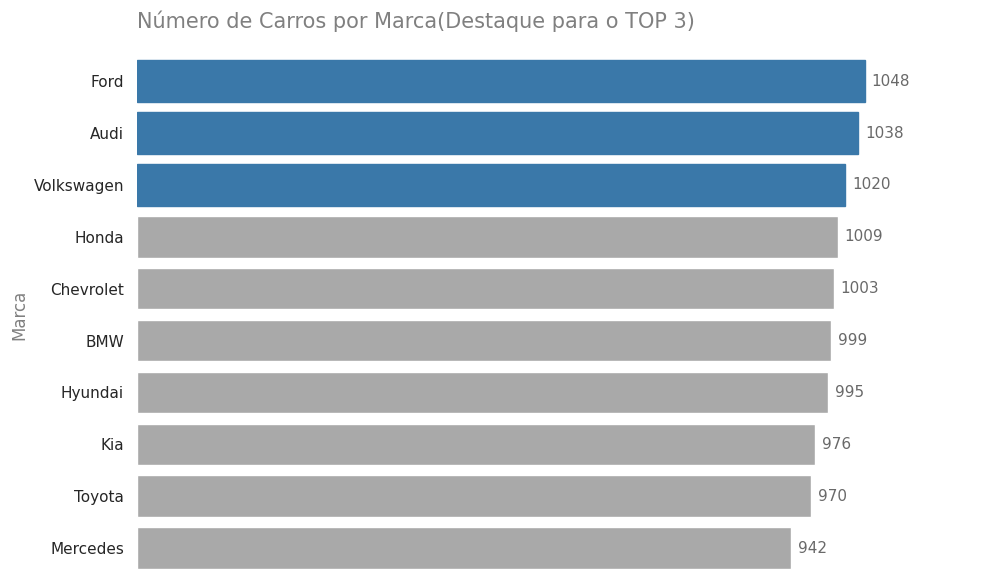

In [10]:
# Contagem de carros por marca
ordem_marcas = dados['Brand'].value_counts().index
contagens = dados['Brand'].value_counts()
top_3_marcas = ordem_marcas[:3]
fig, ax = plt.subplots(figsize=(10, 6))
base_color = '#a9a9a9'
highlight_color = '#3a78a9'
sns.countplot(y=dados['Brand'], order=ordem_marcas, ax=ax, color=base_color)
marcas_no_grafico = [label.get_text() for label in ax.get_yticklabels()]
for i, v in enumerate(ax.patches):
    marca_atual = marcas_no_grafico[i]
    if marca_atual in top_3_marcas:
        v.set_color(highlight_color)
    width = v.get_width()
    label_text = f'{width:.0f}'
    x = v.get_width() + 10
    y = v.get_y() + v.get_height() / 2
    ax.text(x, y, label_text, va='center', ha='left', fontsize=11, color='dimgray')
ax.set_title('Número de Carros por Marca(Destaque para o TOP 3)', fontsize=15, loc='left', pad=20, color ='gray')
ax.set_ylabel('Marca', fontsize=12, color='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('')
ax.tick_params(axis='x', length=0)
ax.set_xticks([])
ax.set_xlim(0, contagens.max() * 1.15)
plt.tight_layout()
plt.show()

O gráfico de barras horizontais demonstra que a quantidade de carros por marca é bem balanceada. Essa é uma ótima característica para um modelo preditivo, pois evita que ele se torne tendencioso.

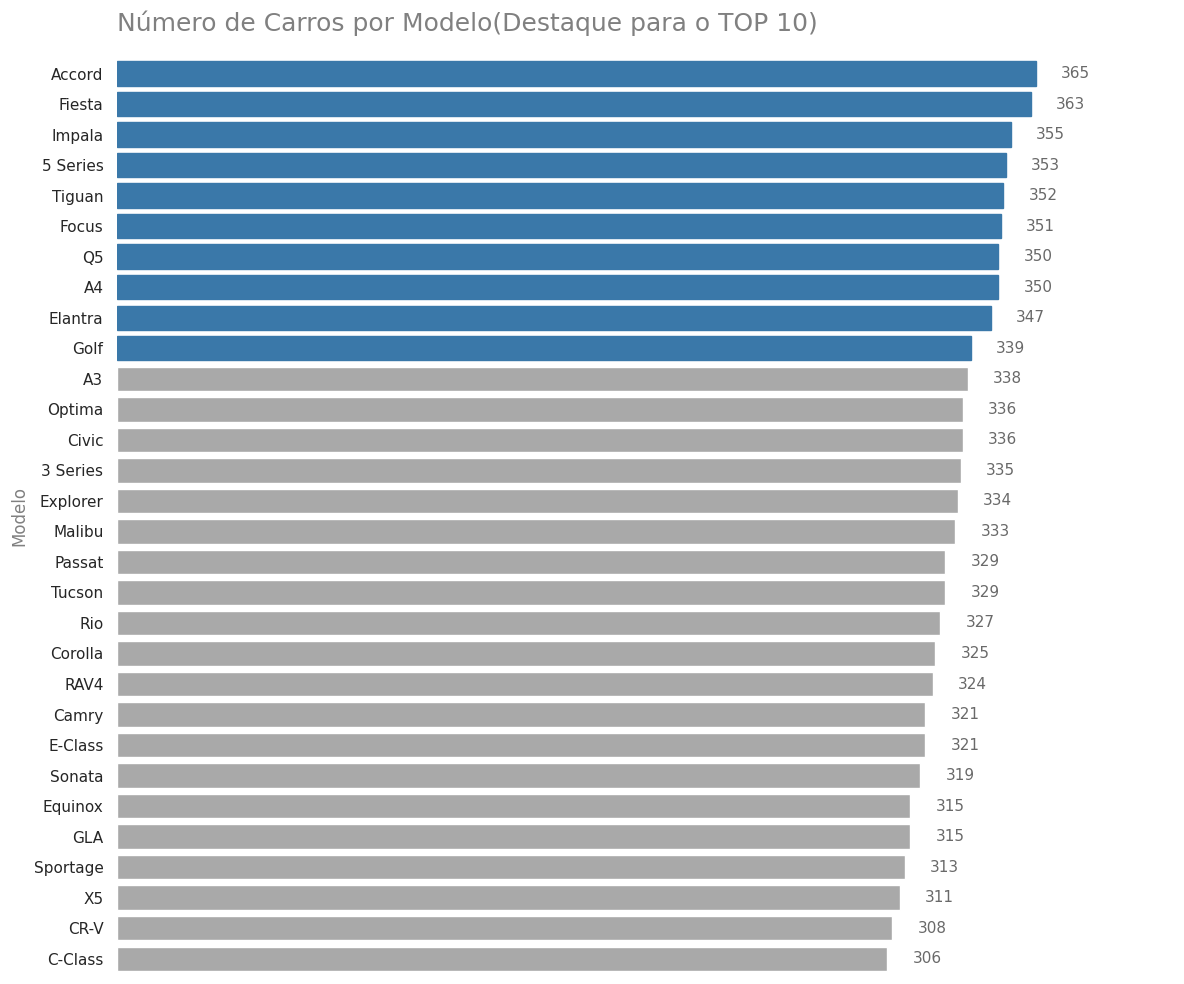

In [11]:
# Contagem de carros por Modelo
ordem_modelos = dados['Model'].value_counts().index
contagens = dados['Model'].value_counts()
top_10_modelos = ordem_modelos[:10]
fig, ax = plt.subplots(figsize=(12, 10))
base_color = '#a9a9a9'
highlight_color = '#3a78a9'
sns.countplot(y=dados['Model'], order=ordem_modelos, ax=ax, color=base_color)
modelos_no_grafico = [label.get_text() for label in ax.get_yticklabels()]
for i, v in enumerate(ax.patches):
    modelo_atual = modelos_no_grafico[i]
    if modelo_atual in top_10_modelos:
        v.set_color(highlight_color)
    width = v.get_width()
    label_text = f'{width:.0f}'
    x = v.get_width() + 10
    y = v.get_y() + v.get_height() / 2
    ax.text(x, y, label_text, va='center', ha='left', fontsize=11, color='dimgray')
ax.set_title('Número de Carros por Modelo(Destaque para o TOP 10)', fontsize=18, loc='left', pad=20, color ='gray')
ax.set_ylabel('Modelo', fontsize=12, color='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('')
ax.tick_params(axis='x', length=0)
ax.set_xticks([])
ax.set_xlim(0, contagens.max() * 1.15)
plt.tight_layout()
plt.show()

O gráfico de barras horizontais demonstra que a quantidade de carros por modelo é bem balanceada. Essa é uma ótima característica para um modelo preditivo, pois evita que ele se torne tendencioso.

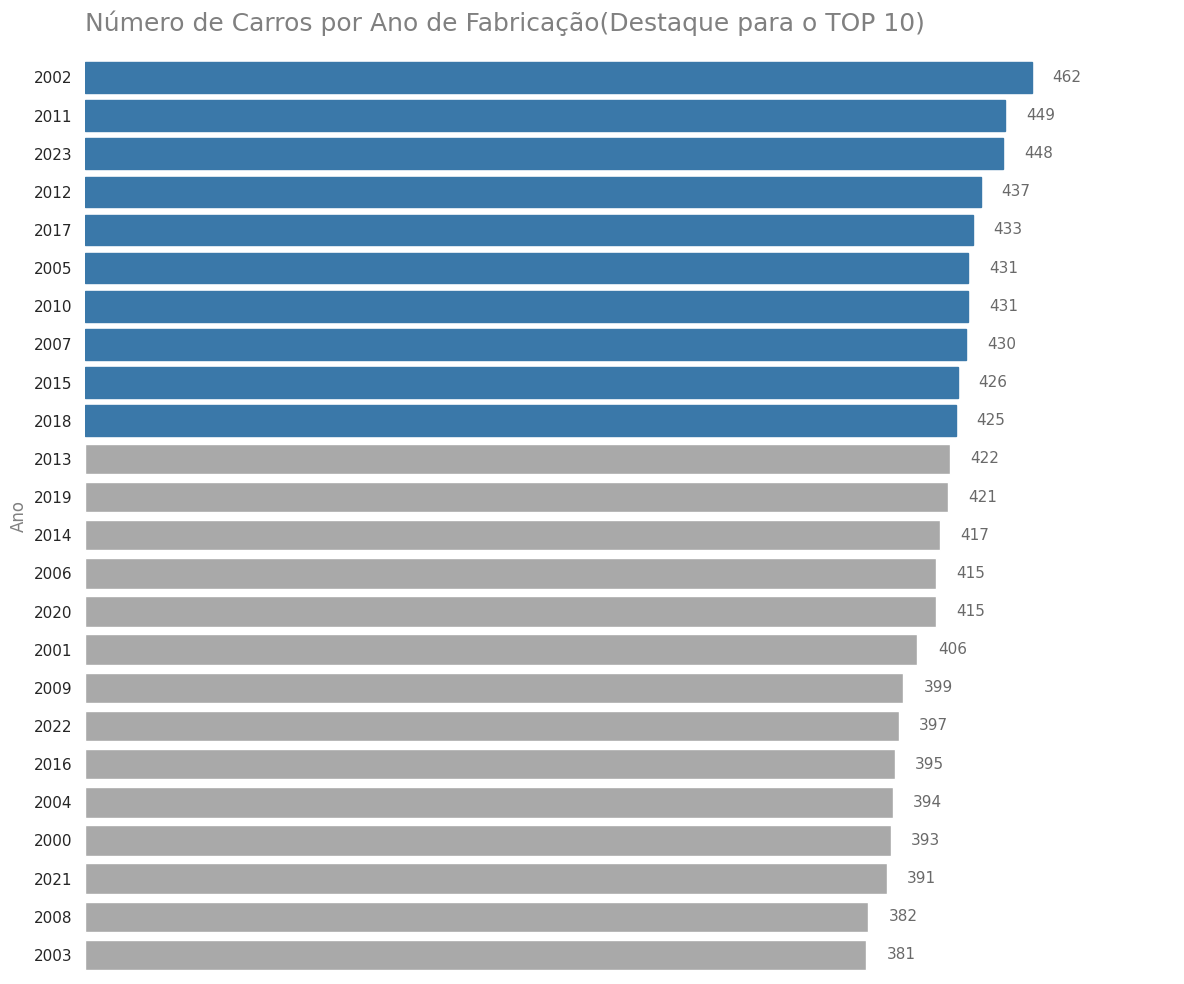

In [12]:
# Contagem de carros por Modelo
ordem_anos = dados['Year'].value_counts().index
contagens = dados['Year'].value_counts()
top_10_anos = ordem_anos[:10]
fig, ax = plt.subplots(figsize=(12, 10)) # Aumentei a altura para caber mais anos
base_color = '#a9a9a9'
highlight_color = '#3a78a9'
sns.countplot(y=dados['Year'], order=ordem_anos, ax=ax, color=base_color)
anos_no_grafico = [label.get_text() for label in ax.get_yticklabels()]
for i, v in enumerate(ax.patches):
    ano_atual_texto = anos_no_grafico[i]
    ano_atual_numero = int(ano_atual_texto)
    if ano_atual_numero in top_10_anos:
        v.set_color(highlight_color)
    width = v.get_width()
    label_text = f'{width:.0f}'
    x = v.get_width() + 10
    y = v.get_y() + v.get_height() / 2
    ax.text(x, y, label_text, va='center', ha='left', fontsize=11, color='dimgray')
ax.set_title('Número de Carros por Ano de Fabricação(Destaque para o TOP 10)', fontsize=18, loc='left', pad=20, color ='gray')
ax.set_ylabel('Ano', fontsize=12, color='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('')
ax.tick_params(axis='x', length=0)
ax.set_xticks([])
ax.set_xlim(0, contagens.max() * 1.15)
plt.tight_layout()
plt.show()

O gráfico de barras horizontais demonstra que a quantidade de carros por ano de fabricação é bem balanceada. Essa é uma ótima característica para um modelo preditivo, pois evita que ele se torne tendencioso.

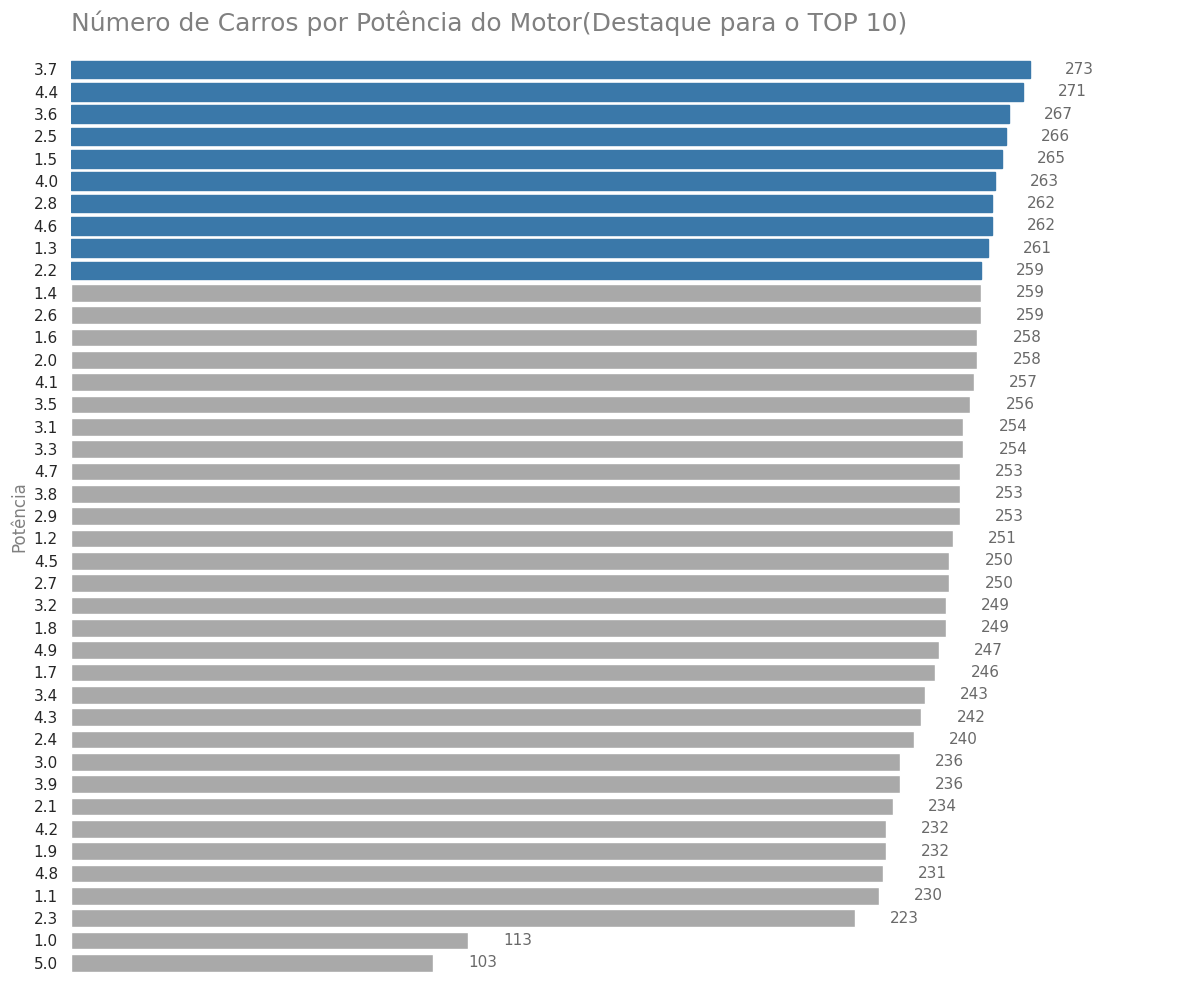

In [13]:
# Contagem de carros por potência do motor
ordem_potencias = dados['Engine_Size'].value_counts().index
contagens = dados['Engine_Size'].value_counts()
top_10_potencias = ordem_potencias[:10]
fig, ax = plt.subplots(figsize=(12, 10))
base_color = '#a9a9a9'
highlight_color = '#3a78a9'
sns.countplot(y=dados['Engine_Size'], order=ordem_potencias, ax=ax, color=base_color)
potencias_no_grafico = [label.get_text() for label in ax.get_yticklabels()]
for i, v in enumerate(ax.patches):
    potencia_atual_texto = potencias_no_grafico[i]
    potencia_atual_numero = float(potencia_atual_texto)
    if potencia_atual_numero in top_10_potencias:
        v.set_color(highlight_color)
    width = v.get_width()
    label_text = f'{width:.0f}'
    x = v.get_width() + 10
    y = v.get_y() + v.get_height() / 2
    ax.text(x, y, label_text, va='center', ha='left', fontsize=11, color='dimgray')
ax.set_title('Número de Carros por Potência do Motor(Destaque para o TOP 10)', fontsize=18, loc='left', pad=20, color ='gray')
ax.set_ylabel('Potência', fontsize=12, color='gray') # Rótulo do eixo Y mais claro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('')
ax.tick_params(axis='x', length=0)
ax.set_xticks([])
ax.set_xlim(0, contagens.max() * 1.15)
plt.tight_layout()
plt.show()

O gráfico de barras horizontais demonstra que a quantidade de carros por potência do motor é bem balanceada. Essa é uma ótima característica para um modelo preditivo, pois evita que ele se torne tendencios.

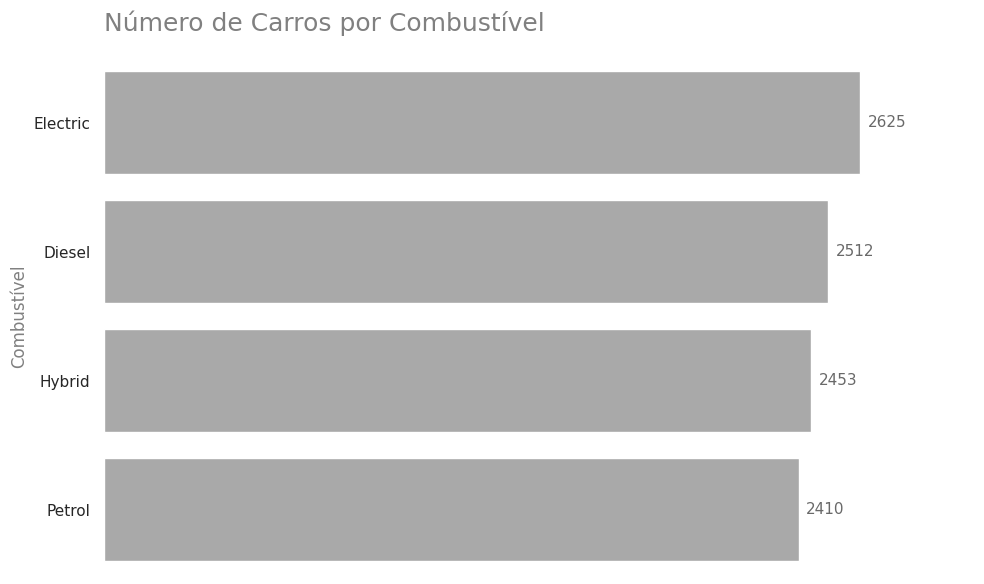

In [14]:
# Contagem de carros por Combustível
ordem_marcas = dados['Fuel_Type'].value_counts().index
contagens = dados['Fuel_Type'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
bar_color = '#a9a9a9'
sns.countplot(y=dados['Fuel_Type'], order=ordem_marcas, ax=ax, color=bar_color)
for v in ax.patches:
    width = v.get_width()
    label_text = f'{width:.0f}'
    x = v.get_width() + (contagens.max() * 0.01) # Posição X do texto com base no valor máximo
    y = v.get_y() + v.get_height() / 2
    ax.text(x, y, label_text, va='center', ha='left', fontsize=11, color='dimgray')
ax.set_title('Número de Carros por Combustível', fontsize=18, loc='left', pad=20, color ='gray')
ax.set_ylabel('Combustível', fontsize=12, color='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('')
ax.tick_params(axis='x', length=0)
ax.set_xticks([])
ax.set_xlim(0, contagens.max() * 1.15)
plt.tight_layout()
plt.show()

O gráfico de barras horizontais demonstra que a quantidade de carros por combustível é bem balanceada. Essa é uma ótima característica para um modelo preditivo, pois evita que ele se torne tendencios.

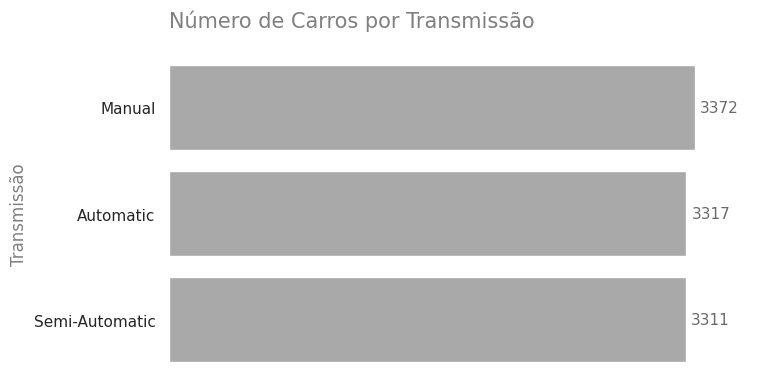

In [15]:
# Contagem de carros por Combustível
ordem_marcas = dados['Transmission'].value_counts().index
contagens = dados['Transmission'].value_counts()
fig, ax = plt.subplots(figsize=(8, 4))
bar_color = '#a9a9a9'
sns.countplot(y=dados['Transmission'], order=ordem_marcas, ax=ax, color=bar_color)
for v in ax.patches:
    width = v.get_width()
    label_text = f'{width:.0f}'
    x = v.get_width() + (contagens.max() * 0.01) # Posição X do texto com base no valor máximo
    y = v.get_y() + v.get_height() / 2
    ax.text(x, y, label_text, va='center', ha='left', fontsize=11, color='dimgray')
ax.set_title('Número de Carros por Transmissão', fontsize=15, loc='left', pad=20, color ='gray')
ax.set_ylabel('Transmissão', fontsize=12, color='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('')
ax.tick_params(axis='x', length=0)
ax.set_xticks([])
ax.set_xlim(0, contagens.max() * 1.15)
plt.tight_layout()
plt.show()

O gráfico de barras horizontais demonstra que a quantidade de carros por transmissão é bem balanceada. Essa é uma ótima característica para um modelo preditivo, pois evita que ele se torne tendencios.

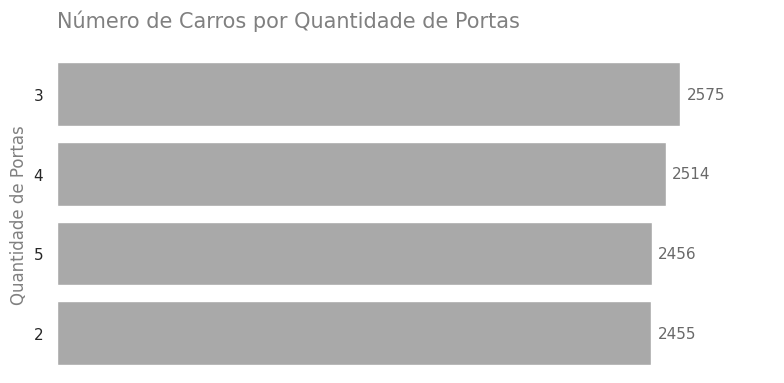

In [16]:
# Contagem de carros por Quantidade de Portas
ordem_marcas = dados['Doors'].value_counts().index
contagens = dados['Doors'].value_counts()
fig, ax = plt.subplots(figsize=(8, 4))
bar_color = '#a9a9a9'
sns.countplot(y=dados['Doors'], order=ordem_marcas, ax=ax, color=bar_color)
for v in ax.patches:
    width = v.get_width()
    label_text = f'{width:.0f}'
    x = v.get_width() + (contagens.max() * 0.01) # Posição X do texto com base no valor máximo
    y = v.get_y() + v.get_height() / 2
    ax.text(x, y, label_text, va='center', ha='left', fontsize=11, color='dimgray')
ax.set_title('Número de Carros por Quantidade de Portas', fontsize=15, loc='left', pad=20, color ='gray')
ax.set_ylabel('Quantidade de Portas', fontsize=12, color='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('')
ax.tick_params(axis='x', length=0)
ax.set_xticks([])
ax.set_xlim(0, contagens.max() * 1.15)
plt.tight_layout()
plt.show()

O gráfico de barras horizontais demonstra que a quantidade de carros por quantidade de portas é bem balanceada. Essa é uma ótima característica para um modelo preditivo, pois evita que ele se torne tendencios.

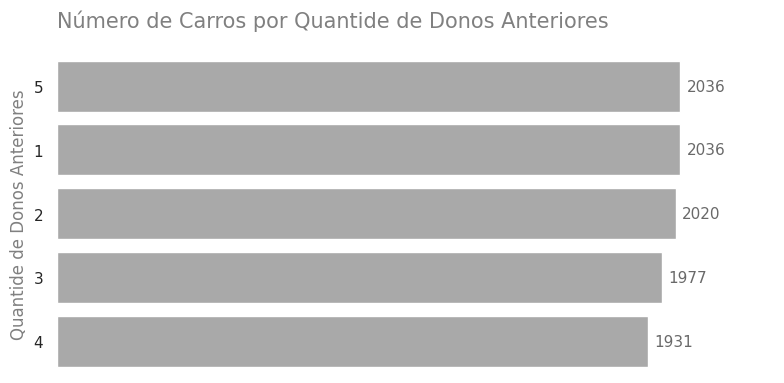

In [17]:
# Contagem de carros por Quantide de Donos
ordem_marcas = dados['Owner_Count'].value_counts().index
contagens = dados['Owner_Count'].value_counts()
fig, ax = plt.subplots(figsize=(8, 4))
bar_color = '#a9a9a9'
sns.countplot(y=dados['Owner_Count'], order=ordem_marcas, ax=ax, color=bar_color)
for v in ax.patches:
    width = v.get_width()
    label_text = f'{width:.0f}'
    x = v.get_width() + (contagens.max() * 0.01) # Posição X do texto com base no valor máximo
    y = v.get_y() + v.get_height() / 2
    ax.text(x, y, label_text, va='center', ha='left', fontsize=11, color='dimgray')
ax.set_title('Número de Carros por Quantide de Donos Anteriores', fontsize=15, loc='left', pad=20, color ='gray')
ax.set_ylabel('Quantide de Donos Anteriores', fontsize=12, color='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('')
ax.tick_params(axis='x', length=0)
ax.set_xticks([])
ax.set_xlim(0, contagens.max() * 1.15)
plt.tight_layout()
plt.show()

O gráfico de barras horizontais demonstra que a quantidade de carros por quantidade de donos é bem balanceada. Essa é uma ótima característica para um modelo preditivo, pois evita que ele se torne tendencios.

 ### Relação entre Atributos e o Preço

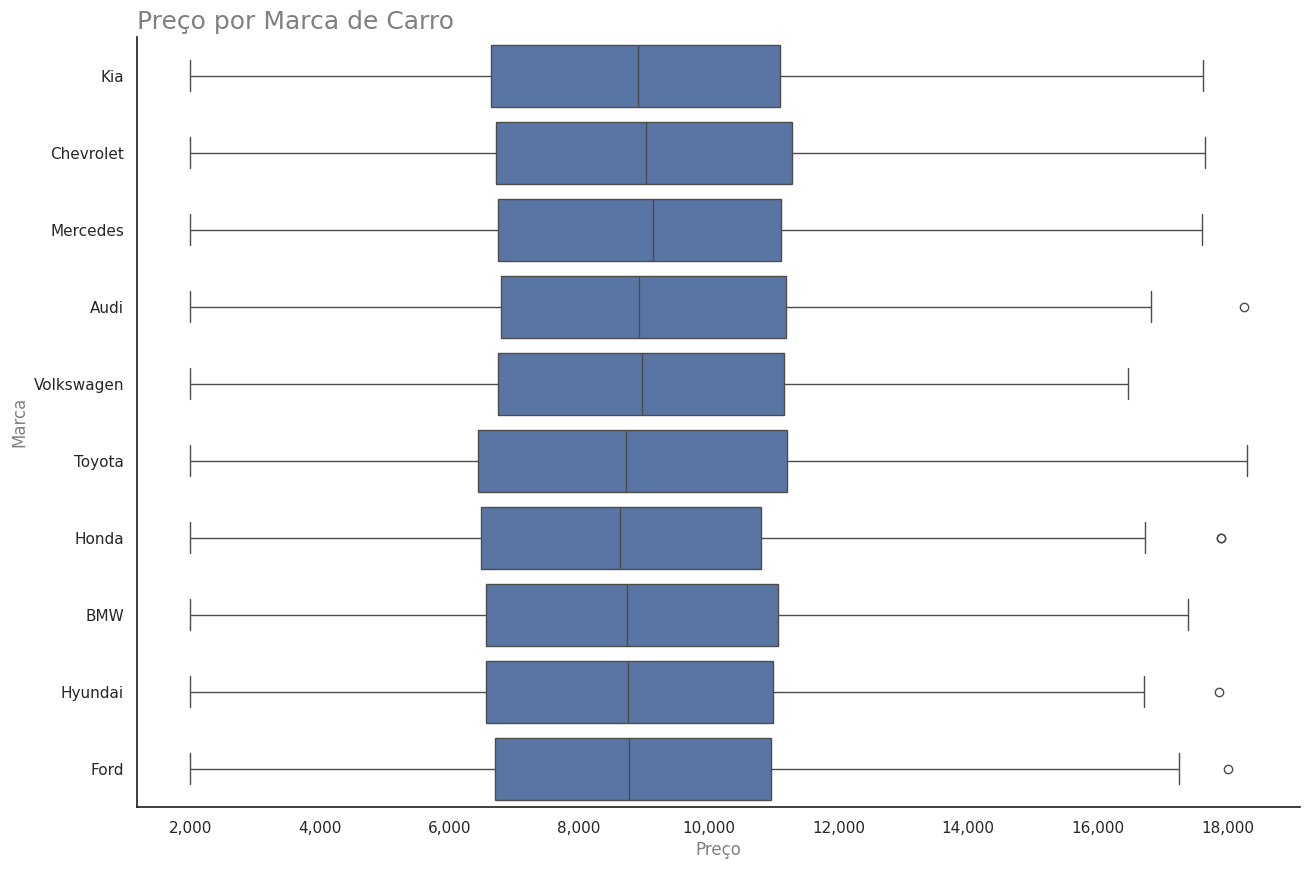

In [18]:
# Boxplot da relação entre Marca e Preço
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='Price', y='Brand', data=dados) # ax armazena os eixos do gráfico
plt.title('Preço por Marca de Carro', fontsize=18, loc='left', color='gray')
plt.xlabel('Preço', color='gray')
plt.ylabel('Marca', color='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.savefig('preco_por_marca.png')
plt.show()

O gráfico de boxplot mostra a distribuição de preços de veículos entre as marcas, revelando que a maioria, como Mercedes, Audi, Volkswagen e Toyota, possui uma faixa de preço e uma mediana muito semelhantes, concentradas em torno de 10.000. Contudo, marcas como Audi, Honda, Hyundai e Ford apresentam outliers, que representam preços mais altos que o restante da amostra.

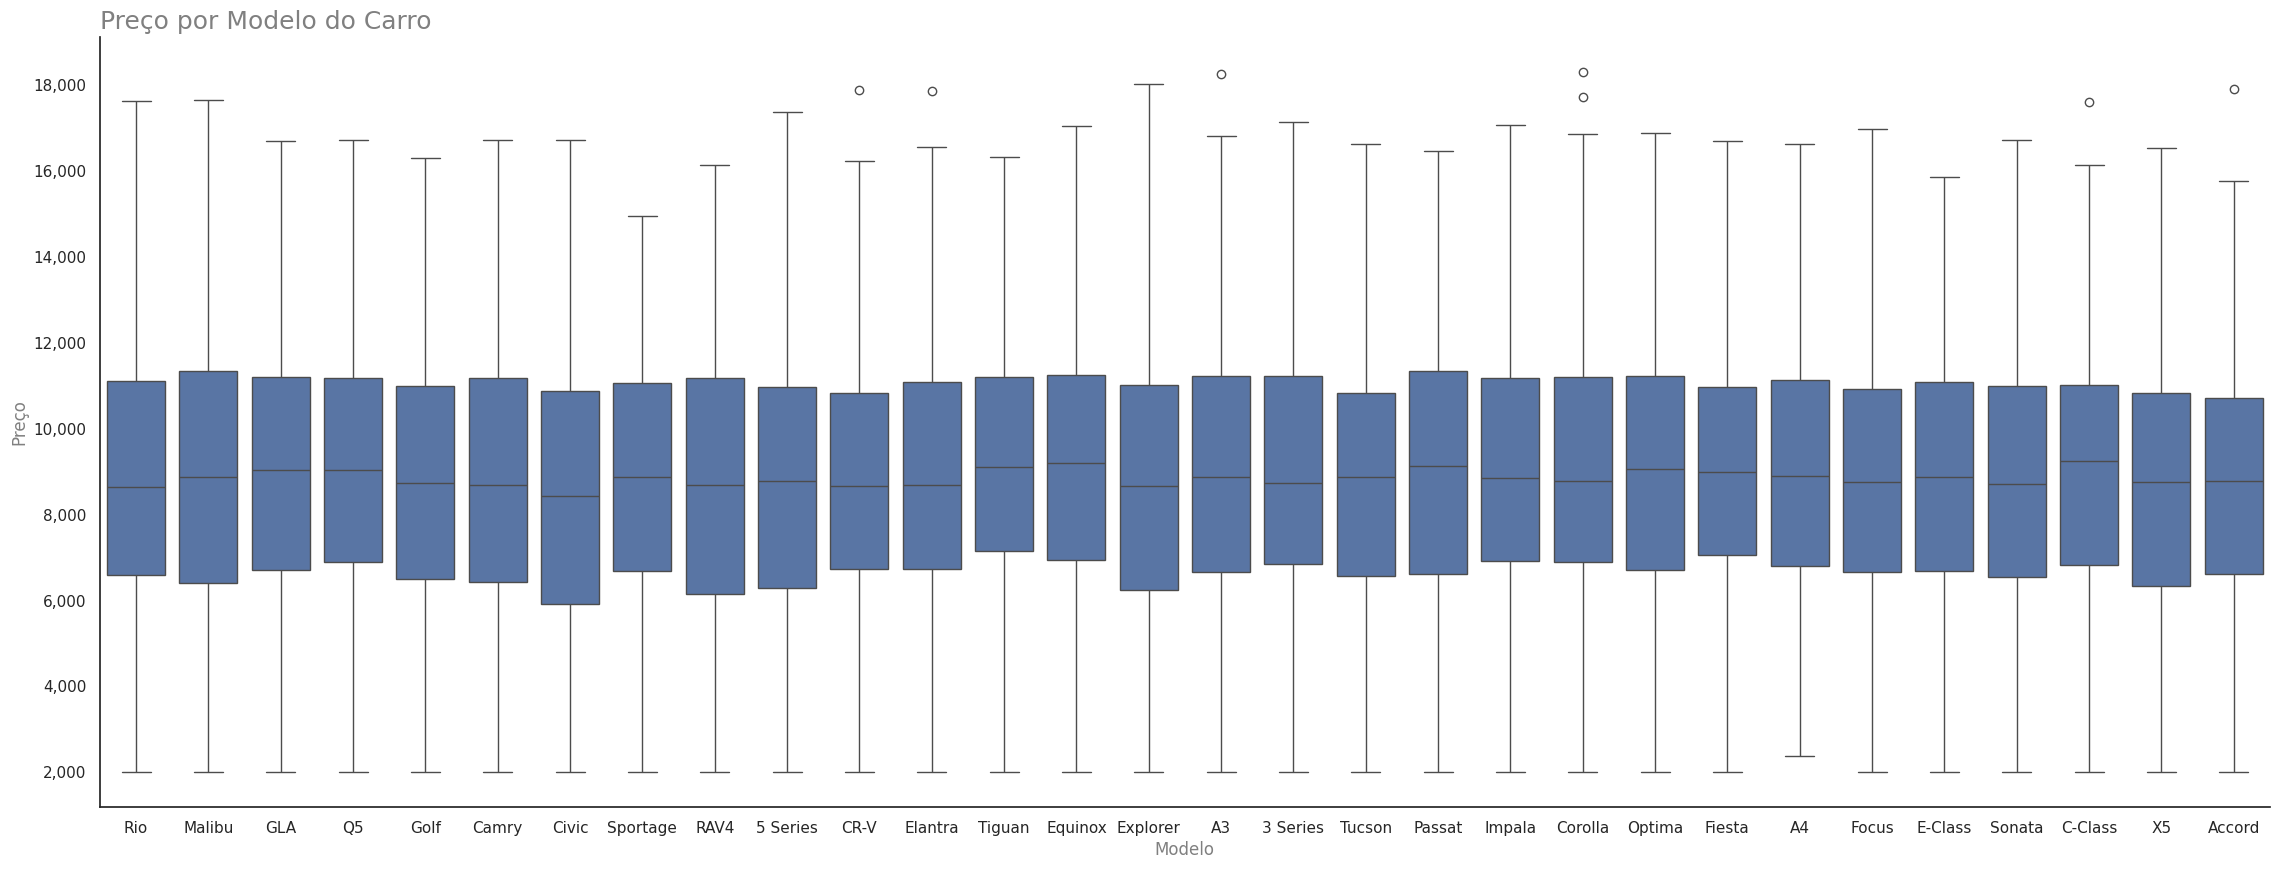

In [19]:
# Boxplot da relação entre Modelo e Preço
plt.figure(figsize=(28, 10))
ax = sns.boxplot(x='Model', y='Price', data=dados) # ax armazena os eixos do gráfico
plt.title('Preço por Modelo do Carro', fontsize=18, loc='left', color='gray')
plt.xlabel('Modelo', color='gray')
plt.ylabel('Preço', color='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.savefig('preco_por_marca.png')
plt.show()

O gráfico de boxplot compara os preços entre modelos de carro, mostrando que, apesar de a faixa de preço mediana ser semelhante e se concentrar entre 9.000 e 11.500, há outliers que variam conforme o modelo.

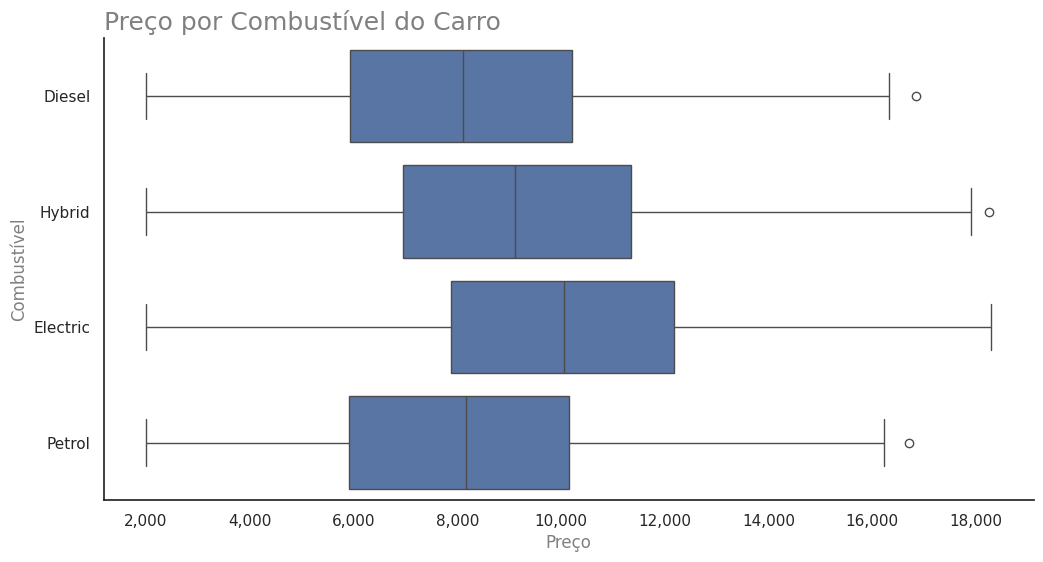

In [20]:
# Boxplot da relação entre Combustível e Preço
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Price', y='Fuel_Type', data=dados) # ax armazena os eixos do gráfico
plt.title('Preço por Combustível do Carro', fontsize=18, loc='left', color='gray')
plt.xlabel('Preço', color='gray')
plt.ylabel('Combustível', color='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.savefig('preco_por_marca.png')
plt.show()

O gráfico boxplot mostra que carros a gasolina são, em média, os mais baratos e os elétricos os mais caros, porém todas as categorias apresentam uma grande variação nos preços.

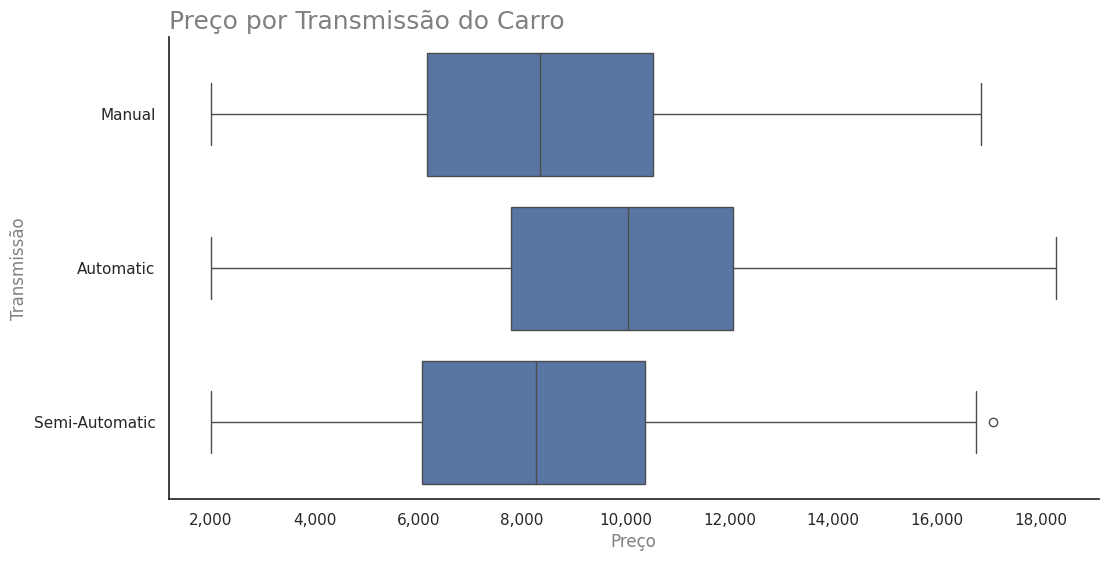

In [21]:
# Boxplot da relação entre Transmissão e Preço
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Price', y='Transmission', data=dados) # ax armazena os eixos do gráfico
plt.title('Preço por Transmissão do Carro', fontsize=18, loc='left', color='gray')
plt.xlabel('Preço', color='gray')
plt.ylabel('Transmissão', color='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.savefig('preco_por_marca.png')
plt.show()

O gráfico boxplot mostra que carros com transmissão automática são, em média, mais caros. Modelos com transmissão manual e semi-automática possuem preços medianos similares e mais baixos, embora todos os tipos apresentem uma ampla variação de valor.

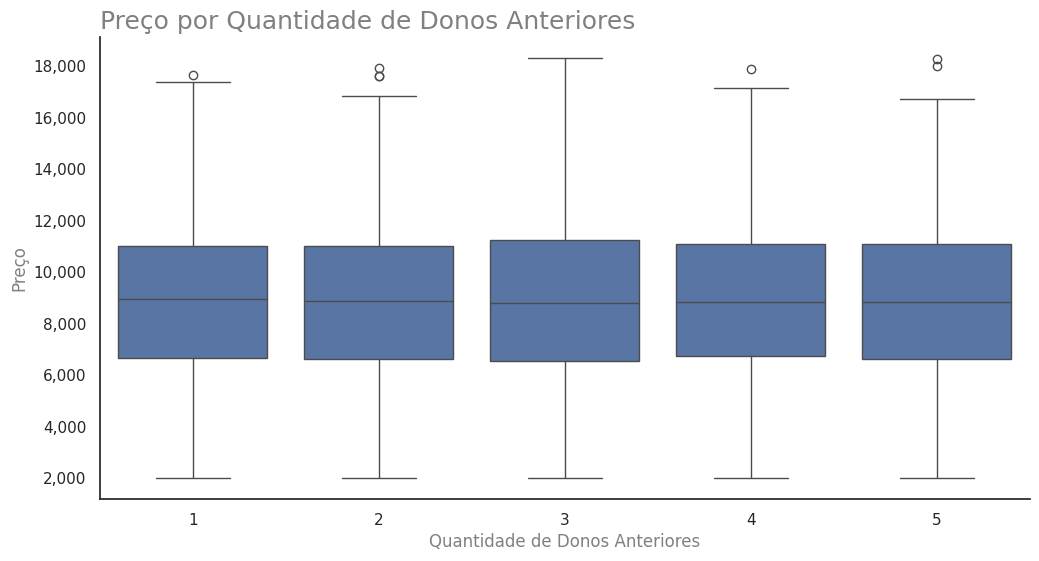

In [22]:
# Boxplot da relação entre Quantidade de Donos e Preço
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Owner_Count', y='Price', data=dados) # ax armazena os eixos do gráfico
plt.title('Preço por Quantidade de Donos Anteriores', fontsize=18, loc='left', color='gray')
plt.xlabel('Quantidade de Donos Anteriores', color='gray')
plt.ylabel('Preço', color='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.savefig('preco_por_marca.png')
plt.show()

O gráfico boxplot mostra que mostra que a quantidade de donos anteriores do veículo tem pouca ou quase nenhuma influência sobre o preço.

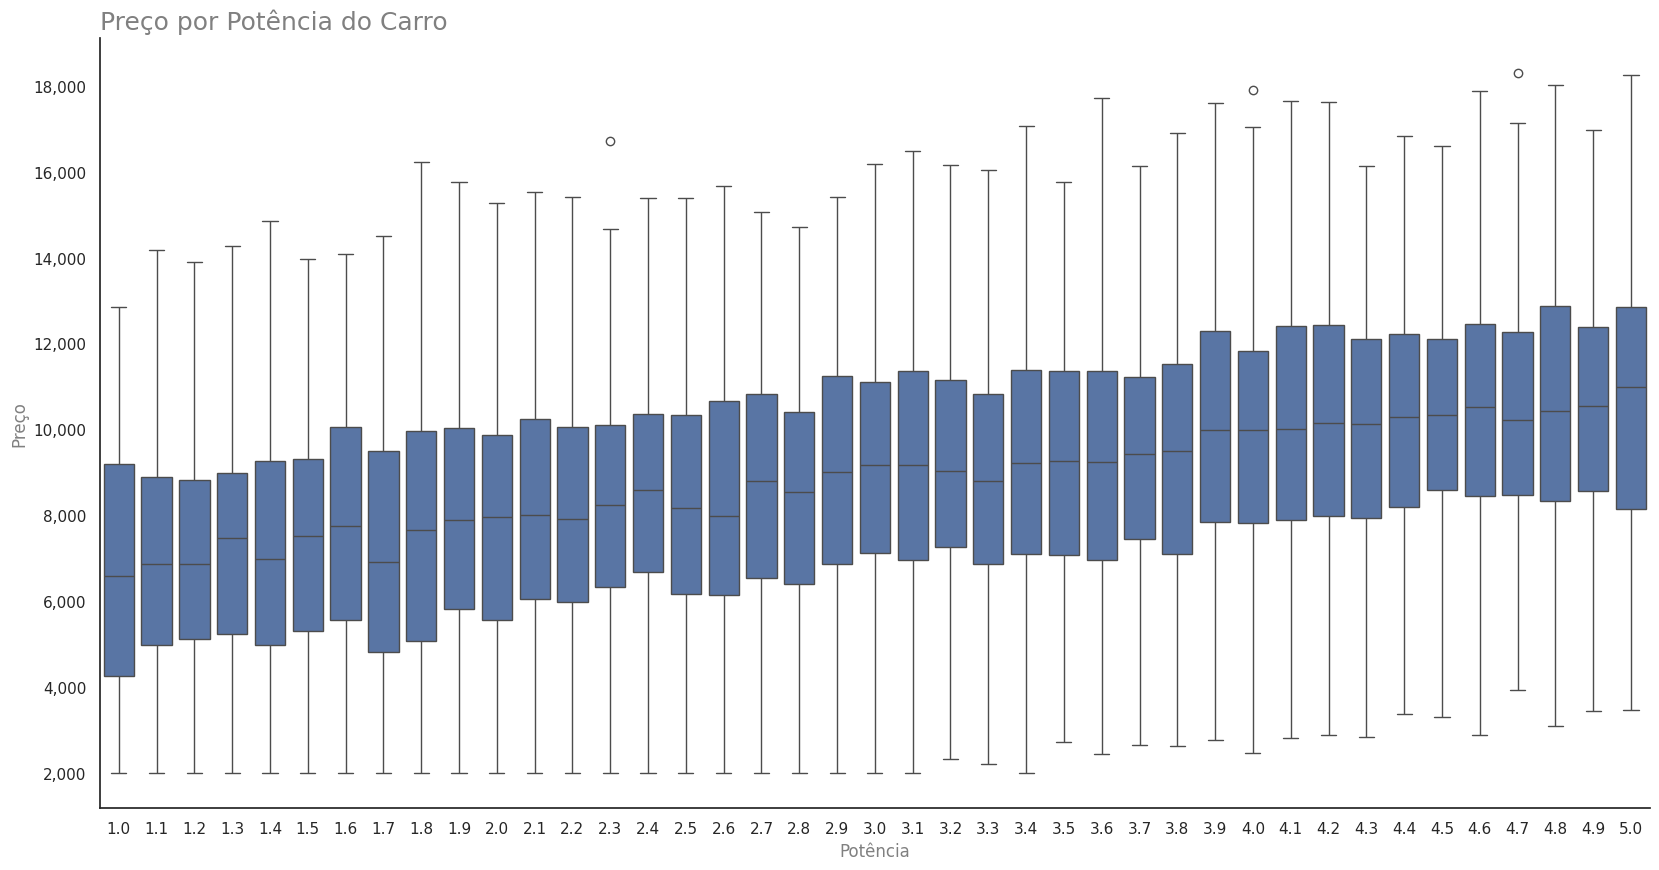

In [23]:
# Boxplot da relação entre Potência e Preço
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x='Engine_Size', y='Price', data=dados) # ax armazena os eixos do gráfico
plt.title('Preço por Potência do Carro', fontsize=18, loc='left', color='gray')
plt.xlabel('Potência', color='gray')
plt.ylabel('Preço', color='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.savefig('preco_por_marca.png')
plt.show()

O gráfico boxplot mostra que existe uma clara correlação positiva entre a potência do carro e seu preço. Conforme a potência do motor aumenta, o preço mediano dos veículos também tende a subir. Além disso, a variação de preços também se torna maior nos carros mais potentes.

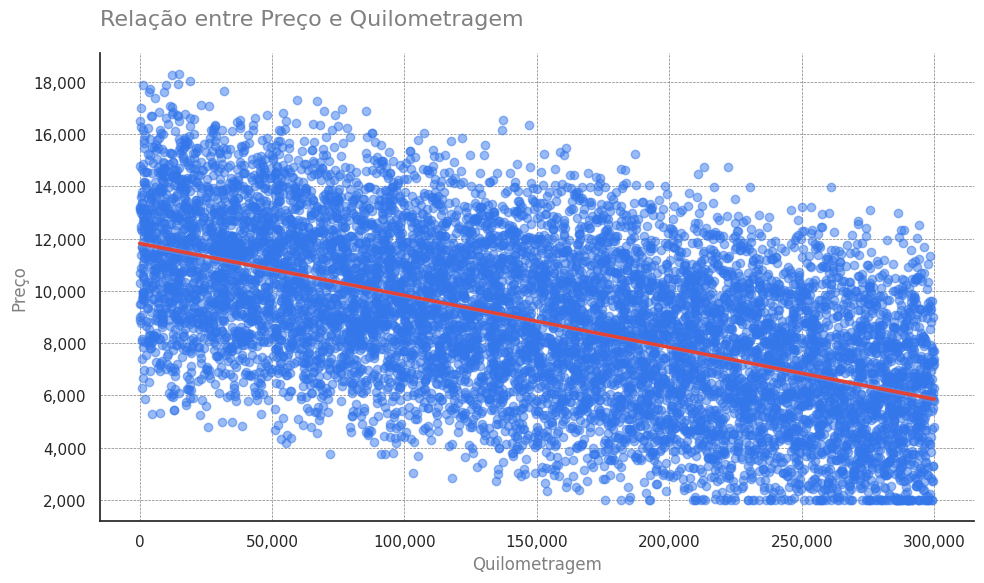

In [24]:
# Gráfico de dispersão entre Preço e Quilometragem
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(
    x='Mileage',
    y='Price',
    data=dados,
    ax=ax,
    scatter_kws={'alpha': 0.5, 'color': '#3477eb'},
    line_kws={'color': '#e34234', 'linewidth': 2.5}
)
sns.despine(ax=ax)
ax.set_title('Relação entre Preço e Quilometragem', fontsize=16, pad=20, loc='left', color='gray')
ax.set_xlabel('Quilometragem', fontsize=12, color='gray')
ax.set_ylabel('Preço', fontsize=12, color='gray')
ax.ticklabel_format(style='plain', axis='both')
from matplotlib.ticker import StrMethodFormatter
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

O gráfico mostra uma clara correlação positiva. A linha de regressão ascendente confirma que carros mais novos tendem a ser mais caros.

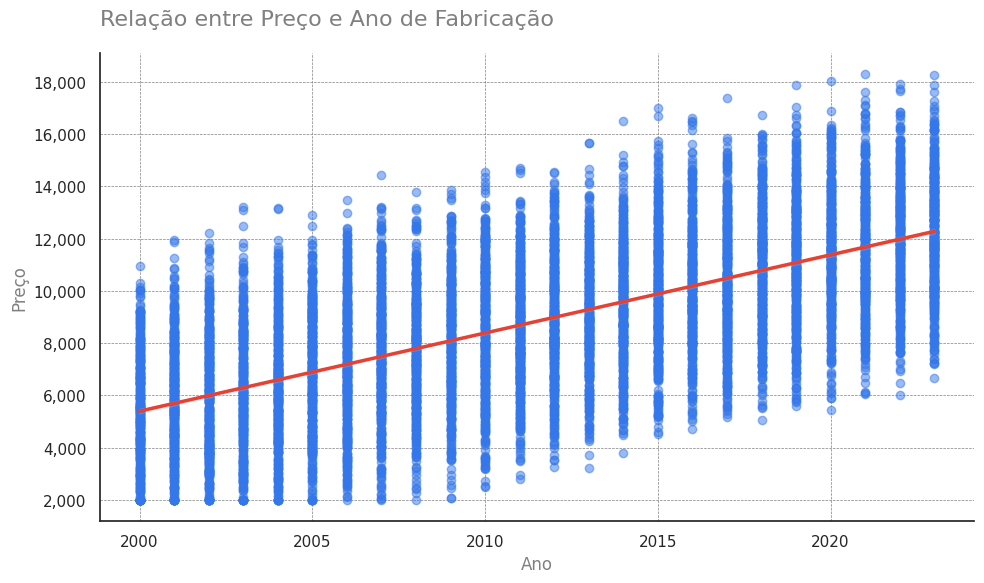

In [25]:
# Gráfico de dispersão entre Preço e Ano de Fabricação
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(
    x='Year',
    y='Price',
    data=dados,
    ax=ax,
    scatter_kws={'alpha': 0.5, 'color': '#3477eb'},
    line_kws={'color': '#e34234', 'linewidth': 2.5}
)
sns.despine(ax=ax)
ax.set_title('Relação entre Preço e Ano de Fabricação', fontsize=16, pad=20, loc='left', color='gray')
ax.set_xlabel('Ano', fontsize=12, color='gray')
ax.set_ylabel('Preço', fontsize=12, color='gray')
ax.ticklabel_format(style='plain', axis='both')
from matplotlib.ticker import StrMethodFormatter
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

O gráfico mostra uma correlação negativa. A linha de regressão descendente confirma que carros com maior quilometragem tendem a ser mais baratos. A dispersão dos pontos é grande, indicando que outros fatores também influenciam fortemente o preço.

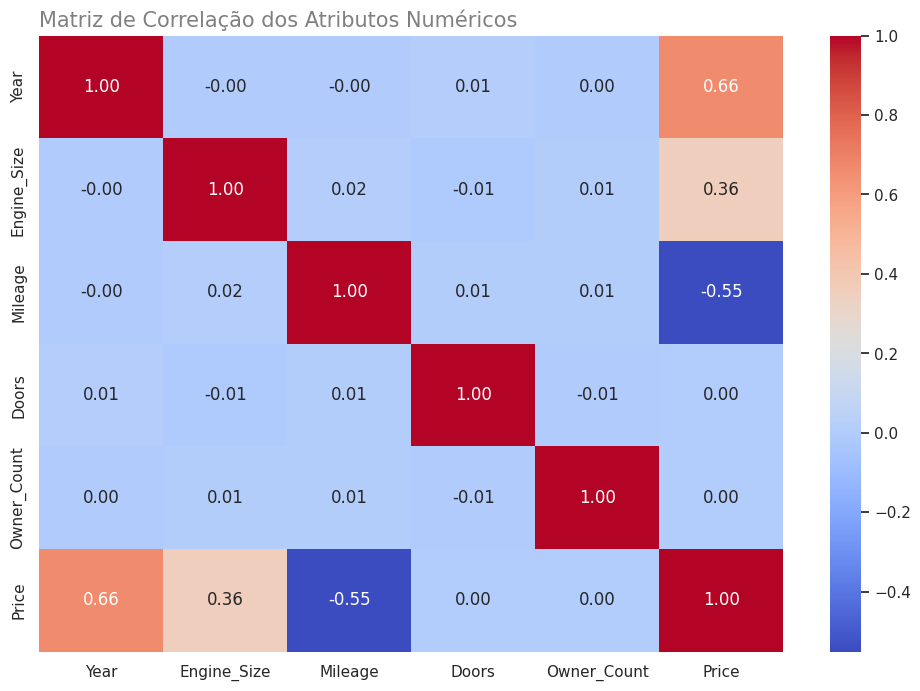

In [26]:
# Matriz de correlação dos atributos númericos
numerical_cols = dados.select_dtypes(include=np.number)
corr_matrix = numerical_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação dos Atributos Numéricos', loc='left', color='gray', fontsize=15)
plt.show()

O gráfico de matriz de correlação mostra a relação linear entre os atributos numéricos do veículo. Ele aponta uma correlação positiva moderada entre o ano de fabricação e o preço, o que significa que os carros mais novos tendem a ser mais caros. A correlação entre preço e quilometragem tem uma correlação moderada negativa, indicando que os carros mais rodados tendem a ser mais baratos. A correlação entre preço e tamanho do motor é positiva, porém fraca, e o número de portas e a quantidade de donos anteriores não apresentam influência no valor do carro.

## Pré-Procesamento

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [27]:
# Realizando uma códia do dataset para o pré processamento
dados_carros = dados.copy()

In [28]:
# Para melhor eficencia do modelo a coluna ano vai ser substituída pela coluna 'Car_Age'
current_year = datetime.datetime.now().year
dados_carros['Car_Age'] = current_year - dados_carros['Year']
dados_carros.drop(columns=['Year'], inplace=True)

In [29]:
# Caregando as5 primeiras linhas do dataset mostrando a alteração realizada
dados_carros.head()

,Brand,Model,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Car_Age
0,Kia,Rio,4.2,Diesel,Manual,289944,3,5,8501,5
1,Chevrolet,Malibu,2.0,Hybrid,Automatic,5356,2,3,12092,13
2,Mercedes,GLA,4.2,Diesel,Automatic,231440,4,2,11171,5
3,Audi,Q5,2.0,Electric,Manual,160971,2,1,11780,2
4,Volkswagen,Golf,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,22


In [30]:
# Separação entre Features (X) e Alvo (y)
# Como foi visto na matriz de correlação as  categorias 'Owner_Count' e 'Doors' não influcencia no preço do carro, por esse motivo não vai ser utlizado essas colunas
X = dados_carros.drop(columns=['Price', 'Owner_Count', 'Doors'], axis=1)
y = dados_carros['Price']

In [31]:
# Didivendo os dados entre treino e teste (80% para teste e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 8000 amostras
Tamanho do conjunto de teste: 2000 amostras


In [32]:
# Identificar os nomes das colunas numéricas e categóricas em X_train
features_numericas = X_train.select_dtypes(include=np.number).columns
features_categoricas = X_train.select_dtypes(include=['object']).columns

print("Colunas Numéricas para Padronizar:", list(features_numericas))
print("Colunas Categóricas para One-Hot Encode:", list(features_categoricas))

Colunas Numéricas para Padronizar: ['Engine_Size', 'Mileage', 'Car_Age']
Colunas Categóricas para One-Hot Encode: ['Brand', 'Model', 'Fuel_Type', 'Transmission']


In [33]:
# Criando o pré-processador
processador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas)
    ])

In [34]:
# Ajustando o pré-processador APENAS nos dados de treino
processador.fit(X_train)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Engine_Size', 'Mileage', 'Car_Age'], dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['Brand', 'Model', 'Fuel_Type', 'Transmission'], dtype='object'))])

In [35]:
# Aplicar a transformação nos dados de treino e teste
X_train_processed = processador.transform(X_train)
X_test_processed = processador.transform(X_test)

print(f"\nDimensões de X_train após pré-processamento: {X_train_processed.shape}")
print(f"Dimensões de X_test após pré-processamento: {X_test_processed.shape}")


Dimensões de X_train após pré-processamento: (8000, 50)
Dimensões de X_test após pré-processamento: (2000, 50)


In [36]:
# Visualização dos dados processados para realização do modelo de predição do preço de carros usados
nomes_colunas = processador.get_feature_names_out()

# 3. Criar e visualizar o DataFrame de TREINO
print("Visualização dos dados de TREINO processados:")
df_train_processed = pd.DataFrame(X_train_processed.toarray(), columns=nomes_colunas)
display(df_train_processed.head())

# 4. Criar e visualizar o DataFrame de TESTE
print("\nVisualização dos dados de TESTE processados:")
df_test_processed = pd.DataFrame(X_test_processed.toarray(), columns=nomes_colunas)
display(df_test_processed.head())

Visualização dos dados de TREINO processados:


,num__Engine_Size,num__Mileage,num__Car_Age,cat__Brand_Audi,cat__Brand_BMW,cat__Brand_Chevrolet,cat__Brand_Ford,cat__Brand_Honda,cat__Brand_Hyundai,cat__Brand_Kia,...,cat__Model_Tiguan,cat__Model_Tucson,cat__Model_X5,cat__Fuel_Type_Diesel,cat__Fuel_Type_Electric,cat__Fuel_Type_Hybrid,cat__Fuel_Type_Petrol,cat__Transmission_Automatic,cat__Transmission_Manual,cat__Transmission_Semi-Automatic
0,0.176135,-1.333932,0.655377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.563621,0.870313,0.220429,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.951198,-1.570781,0.800360,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.124633,0.581575,-1.084418,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.523006,-1.722892,0.945343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0



Visualização dos dados de TESTE processados:


,num__Engine_Size,num__Mileage,num__Car_Age,cat__Brand_Audi,cat__Brand_BMW,cat__Brand_Chevrolet,cat__Brand_Ford,cat__Brand_Honda,cat__Brand_Hyundai,cat__Brand_Kia,...,cat__Model_Tiguan,cat__Model_Tucson,cat__Model_X5,cat__Fuel_Type_Diesel,cat__Fuel_Type_Electric,cat__Fuel_Type_Hybrid,cat__Fuel_Type_Petrol,cat__Transmission_Automatic,cat__Transmission_Manual,cat__Transmission_Semi-Automatic
0,-1.558223,1.250267,0.945343,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.084019,-0.435145,-0.214520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.737057,-1.570342,0.075446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.696442,-0.186808,0.655377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.471505,-1.511017,-0.069537,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Conclusão

Este projeto teve como objetivo criar um modelo para prever o preço de carros usados. Foi realizada uma análise exploratória, na qual se confirmou que o conjunto de dados não apresentava grandes necessidades de tratamento, pois não continha valores nulos. Observou-se também que a quantidade de dados para cada categoria estava bem distribuída. Para criar o modelo, foi utilizada uma abordagem de regressão, e as variáveis categóricas foram tratadas com o método OneHotEncoder.

Nem todas as hipóteses foram validadas:



**Carros mais novos tendem a ter um preço maior?** Sim, foi verificado que carros
mais novos tendem a ter um preço mais elevado.

**Carros com menor quilometragem tendem a ter um preço maior?** Sim, carros com menor quilometragem tendem a ter um preço mais elevado.

**A marca e o modelo dos carros podem ser um fator determinante para um preço mais elevado?** Sim, foi verificado que algumas marcas e modelos, por serem considerados de luxo, têm um preço mais elevado.

**O número de donos anteriores pode influenciar o valor do carro?** Não, foi mostrado que o número de donos anteriores não é relevante para o preço do carro.

**O motor do carro pode influenciar o seu valor?** Sim, mas não influencia tanto no valor do carro quanto o esperado.



